## Business Intelligence

In [1]:
from pathlib import Path

from IPython.display import display, Markdown

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# siehe Hilfscode.py
from Hilfscode import draw_piechart
from Hilfscode import cat_compare

path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

des = description.loc[description['Table']=="application_{train|test}.csv", "Row":"Special"]

app_train["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

n_heads = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
md_heads = ['CNT_CHILDREN', "CNT_FAM_MEMBERS","HOUR_APPR_PROCESS_START", "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
ms_heads = [head for head in m_heads if head not in md_heads]

payback = app_train[app_train["TARGET"] == "Payback"]
default = app_train[app_train["TARGET"] == "Default"]

m = app_train[m_heads]
n = app_train[n_heads]

md = m[md_heads]
mdp = md[app_train["TARGET"] == "Payback"]
mdd = md[app_train["TARGET"] == "Default"]

ms = m[ms_heads]
msp = ms[app_train["TARGET"] == "Payback"]
msd = ms[app_train["TARGET"] == "Default"]

### Dicing: Unterteilung in Payback & Default

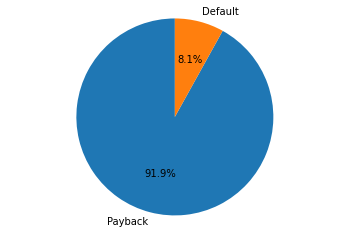

In [2]:
pb = len(payback.index)
df = len(default.index)
N = pb + df

labels = "Payback", "Default"
sizes = [pb/N,df/N]
title = ""

arguments = [(labels, sizes, title)]
draw_piechart(arguments)

### Dicing: Betrachtung der kategorischen Variablen

#### Bestimmung der wichtigsten Kategorien

Folgend werden die wichtigsten 10 Kategorien bestimmt, mit denen die man die Menge der Kreditnehmer bestmöglich nach Payback oder Default unterscheiden kann. Als Kennzahl dient die Differenz der relativen Häufigkeiten.

Berechnungsbeispiel:
* 66,6 % aller zurückzahlenden Kreditnehmer sind Frauen
* 57,1 % aller ausfallenden Kreditnehmer sind Frauen
* -> Eine Kreditrückzahlung durch eine Frau ist 9,5 pP höher als ein Kreditausfall durch eine Frau.

Am Ende des Dokuments wird diese Betrachtung für alle kategorischen Variablen durchgeführt.

In [3]:
top10 = []
bot10 = []

for head in n.columns.values:
    df1 = payback[head].value_counts().rename_axis(head).reset_index(name='payback').head()
    df2 = default[head].value_counts().rename_axis(head).reset_index(name='default').head()
    
    df1["payback"] = df1["payback"]/df1["payback"].sum()*100
    df2["default"] = df2["default"]/df2["default"].sum()*100
    
    df = df1.merge(df2, how="outer", on=head)
    
    df["change"] = (df["default"]-df["payback"])
    
    df = df.sort_values("change", ascending=False)
    
    for element in df["change"]:
        if np.isnan(element):
            continue
        if len(top10) < 10:
            row = df.loc[df["change"] == element]
            cat = row[head][row[head].index[0]]
            top10.append((head, cat, element))
        else:
            if element > top10[-1][-1]:
                top10.pop(-1)
                row = df.loc[df["change"] == element]
                cat = row[head][row[head].index[0]]
                top10.append((head, cat, element))
        
        top10 = sorted(top10, key=lambda value: value[2], reverse=True)
    
    df = df.sort_values("change", ascending=True)

    for element in df["change"]:
        if np.isnan(element):
            continue
        if len(bot10) < 10:
            row = df.loc[df["change"] == element]
            cat = row[head][row[head].index[0]]
            bot10.append((head, cat, element))
        else:
            if element < bot10[-1][-1]:
                bot10.pop(-1)
                row = df.loc[df["change"] == element]
                cat = row[head][row[head].index[0]]
                bot10.append((head, cat, element))
        
        bot10 = sorted(bot10, key=lambda value: value[2], reverse=False)
    
# typische Paybacks
df = pd.DataFrame(bot10, columns=["Kategorie","Unterkategorie","Top 10 Payback"])
display(df)
    
# typische Defaults
df = pd.DataFrame(top10,columns=["Kategorie","Unterkategorie","Top 10 Default"])
display(df)

,Kategorie,Unterkategorie,Top 10 Payback
0,ORGANIZATION_TYPE,XNA,-10.612452
1,CODE_GENDER,F,-9.523671
2,NAME_EDUCATION_TYPE,Higher education,-8.915516
3,REG_CITY_NOT_WORK_CITY,0,-7.883082
4,FLAG_DOCUMENT_3,0,-7.386514
5,NAME_INCOME_TYPE,Pensioner,-6.518111
6,FLAG_EMP_PHONE,0,-6.486361
7,OCCUPATION_TYPE,Core staff,-6.032228
8,REGION_RATING_CLIENT_W_CITY,1,-4.838815
9,OCCUPATION_TYPE,Managers,-4.825831


,Kategorie,Unterkategorie,Top 10 Default
0,NAME_INCOME_TYPE,Working,10.544642
1,CODE_GENDER,M,9.525086
2,NAME_EDUCATION_TYPE,Secondary / secondary special,8.297446
3,REG_CITY_NOT_WORK_CITY,1,7.883082
4,FLAG_DOCUMENT_3,1,7.386514
5,FLAG_EMP_PHONE,1,6.486361
6,REGION_RATING_CLIENT,3,6.416818
7,REGION_RATING_CLIENT_W_CITY,3,6.398668
8,OCCUPATION_TYPE,Laborers,6.329470
9,ORGANIZATION_TYPE,Business Entity Type 3,5.712701


#### Geschlecht

#### CODE_GENDER

#### Payback

F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64 



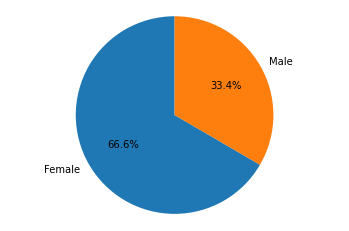

#### CODE_GENDER

#### Default

F    14170
M    10655
Name: CODE_GENDER, dtype: int64 



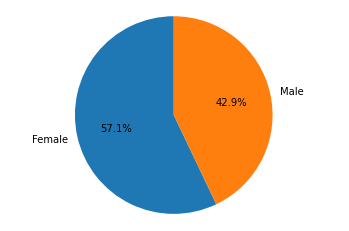

In [4]:
column = "CODE_GENDER"

# Payback
title = ""
rest = -1
labels = ["Female", "Male"]
count1 = payback[column].value_counts()
N1 = len(payback[column])
arg_payback = cat_compare(count1, N1, column, title, rest, labels)

display(Markdown("#### {}".format(column)))
display(Markdown("#### Payback"))
print(count1, "\n")

# Piecharts
arg_payback = cat_compare(count1, N1, column, title, rest, labels)
draw_piechart([arg_payback])

column = "CODE_GENDER"

# Default
title = ""
rest = 0
labels = ["Female", "Male"]
count2 = default[column].value_counts()
N2 = len(default[column])

display(Markdown("#### {}".format(column)))
display(Markdown("#### Default"))
print(count2, "\n")

arg_default = cat_compare(count2, N2, column, title, rest, labels)
draw_piechart([arg_default])

#### Einkommen

#### NAME_INCOME_TYPE

#### Payback

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64 



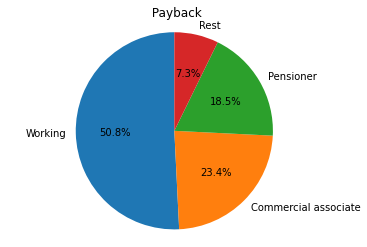

#### NAME_INCOME_TYPE

#### Default

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64 



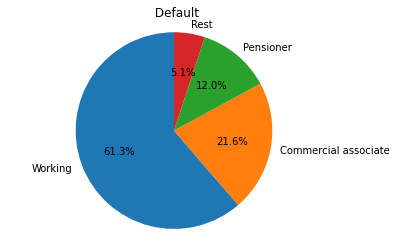

In [5]:
column = "NAME_INCOME_TYPE"

# Payback
title = " Payback"
rest = -4
labels = None
count1 = payback[column].value_counts()
N1 = len(payback[column])
arg_payback = cat_compare(count1, N1, column, title, rest, labels)

# Prints
display(Markdown("#### {}".format(column)))
display(Markdown("#### Payback"))
print(count1, "\n")

draw_piechart([arg_payback])

column = "NAME_INCOME_TYPE"

# Default
title = " Default"
rest = -2
count2 = default[column].value_counts()
N2 = len(default[column])
arg_default = cat_compare(count2, N2, column, title, rest, labels)

display(Markdown("#### {}".format(column)))
display(Markdown("#### Default"))
print(count2, "\n")

draw_piechart([arg_default])

#### Bildung 

#### NAME_EDUCATION_TYPE

#### Payback

Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64 



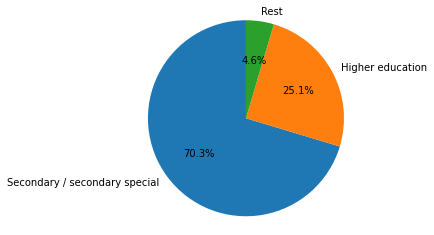

#### NAME_EDUCATION_TYPE

#### Default

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64 



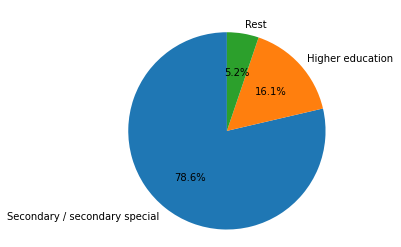

In [6]:
column = "NAME_EDUCATION_TYPE"

# Payback
title = ""
rest = -2
labels = None
count1 = payback[column].value_counts()
N1 = len(payback[column])
arg_payback = cat_compare(count1, N1, column, title, rest, labels)

# Prints
display(Markdown("#### {}".format(column)))
display(Markdown("#### Payback"))
print(count1, "\n")

# Piecharts
draw_piechart([arg_payback])

column = "NAME_EDUCATION_TYPE"

# Default
title = " "
rest = -2
count2 = default[column].value_counts()
N2 = len(default[column])

# Prints
display(Markdown("#### {}".format(column)))
display(Markdown("#### Default"))
print(count2, "\n")

# Piecharts

arg_default = cat_compare(count2, N2, column, title, rest, labels)
draw_piechart([arg_default])

#### Organisation

#### ORGANIZATION_TYPE

#### Payback

Business Entity Type 3    61669
XNA                       52384
Self-employed             34504
Other                     15408
Medicine                  10456
Government                 9678
Business Entity Type 2     9653
School                     8367
Trade: type 7              7091
Kindergarten               6396
Construction               5936
Business Entity Type 1     5497
Transport: type 4          4897
Industry: type 9           3143
Trade: type 3              3131
Industry: type 3           2930
Security                   2923
Housing                    2723
Military                   2499
Industry: type 11          2470
Bank                       2377
Police                     2224
Agriculture                2197
Transport: type 2          2032
Postal                     1975
Security Ministries        1878
Trade: type 2              1767
Restaurant                 1599
Services                   1471
University                 1262
Industry: type 7           1202
Transpor

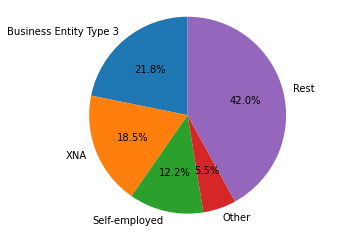

#### ORGANIZATION_TYPE

#### Default

Business Entity Type 3    6323
Self-employed             3908
XNA                       2990
Other                     1275
Business Entity Type 2     900
Construction               785
Trade: type 7              740
Medicine                   737
Government                 726
School                     526
Transport: type 4          501
Business Entity Type 1     487
Kindergarten               484
Trade: type 3              361
Industry: type 3           348
Security                   324
Agriculture                257
Housing                    235
Industry: type 11          234
Industry: type 9           225
Restaurant                 212
Transport: type 3          187
Postal                     182
Transport: type 2          172
Military                   135
Trade: type 2              133
Bank                       130
Police                     117
Industry: type 1           115
Industry: type 7           105
Services                   104
Security Ministries         96
Industry

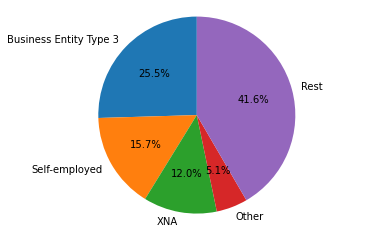

In [7]:
column = "ORGANIZATION_TYPE"

# Payback
title = ""
rest = -53
labels = None
count1 = payback[column].value_counts()
N1 = len(payback[column])
arg_payback = cat_compare(count1, N1, column, title, rest, labels)

# Prints
display(Markdown("#### {}".format(column)))
display(Markdown("#### Payback"))
print(count1, "\n")

# Piecharts
draw_piechart([arg_payback])

column = "ORGANIZATION_TYPE"

# Default
title = ""
rest = -53
count2 = default[column].value_counts()
N2 = len(default[column])

# Prints
display(Markdown("#### {}".format(column)))
display(Markdown("#### Default"))
print(count2, "\n")

# Piecharts

arg_default = cat_compare(count2, N2, column, title, rest, labels)
draw_piechart([arg_default])

### Metrische Daten

#### EXT_SOURCE_1

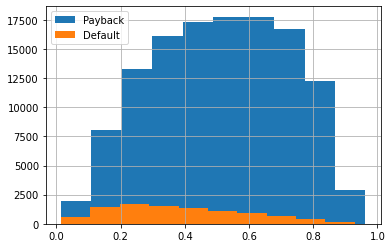

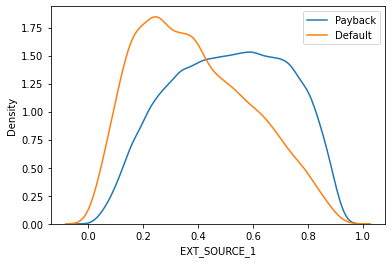

In [8]:
head = "EXT_SOURCE_1"

payback[head].hist()
default[head].hist()
plt.legend(labels=["Payback","Default"])

plt.show()

sns.kdeplot(payback[head])
sns.kdeplot(default[head])
plt.legend(labels=["Payback","Default"])

plt.show()

#### EXT_SOURCE_2

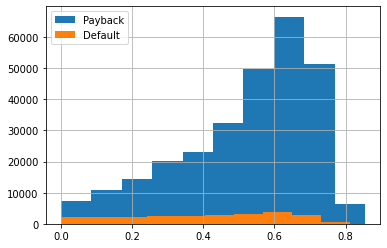

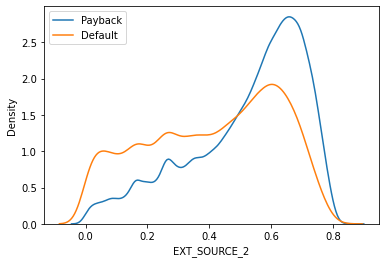

In [9]:
head = "EXT_SOURCE_2"

payback[head].hist()
default[head].hist()
plt.legend(labels=["Payback","Default"])

plt.show()

sns.kdeplot(payback[head])
sns.kdeplot(default[head])
plt.legend(labels=["Payback","Default"])

plt.show()

#### EXT_SOURCE_3

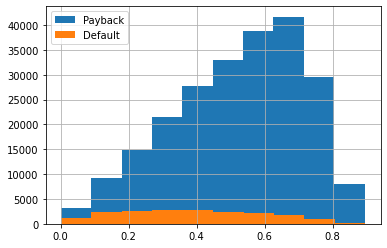

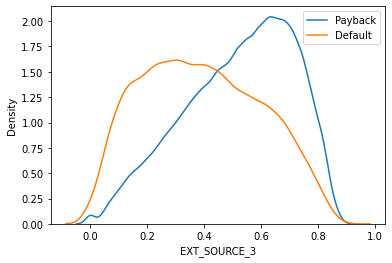

In [10]:
head = "EXT_SOURCE_3"

payback[head].hist()
default[head].hist()
plt.legend(labels=["Payback","Default"])

plt.show()

sns.kdeplot(payback[head])
sns.kdeplot(default[head])
plt.legend(labels=["Payback","Default"])

plt.show()

#### Alter

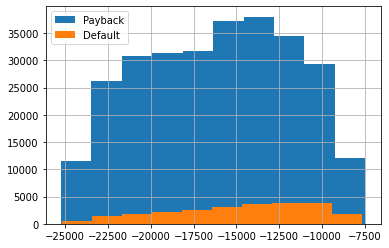

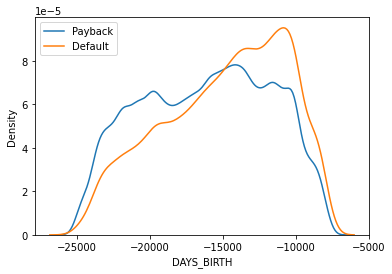

In [11]:
head = "DAYS_BIRTH"

payback[head].hist()
default[head].hist()
plt.legend(labels=["Payback","Default"])

plt.show()

sns.kdeplot(payback[head])
sns.kdeplot(default[head])
plt.legend(labels=["Payback","Default"])

plt.show()

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


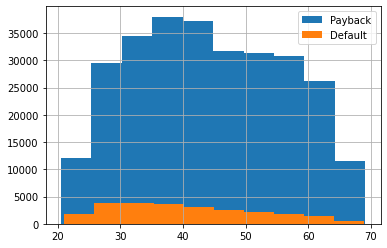

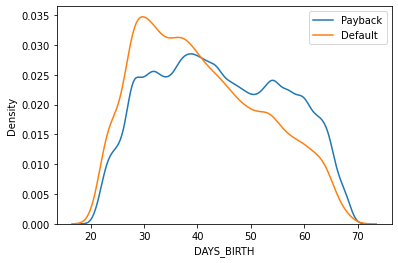

In [12]:
head = "DAYS_BIRTH"

payback.loc[:,head] /= -365
default.loc[:,head] /= -365

payback[head].hist()
default[head].hist()
plt.legend(labels=["Payback","Default"])

plt.show()

sns.kdeplot(payback[head])
sns.kdeplot(default[head])
plt.legend(labels=["Payback","Default"])

plt.show()

#### Arbeitsjahre

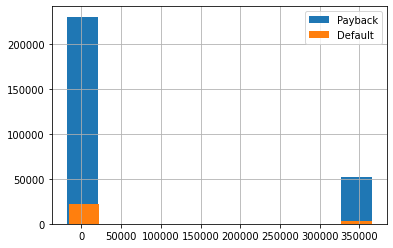

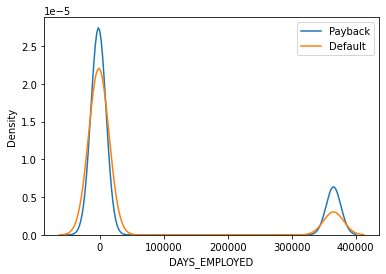

In [13]:
head = "DAYS_EMPLOYED"

payback[head].hist()
default[head].hist()
plt.legend(labels=["Payback","Default"])

plt.show()

sns.kdeplot(payback[head])
sns.kdeplot(default[head])
plt.legend(labels=["Payback","Default"])

plt.show()

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


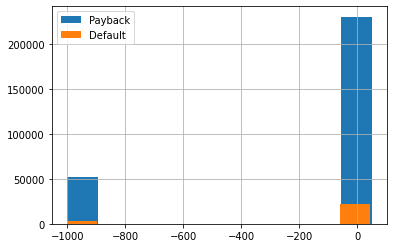

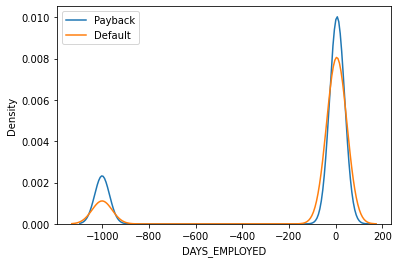

In [14]:
head = "DAYS_EMPLOYED"

payback.loc[:,head] /= -365
default.loc[:,head] /= -365

payback[head].hist()
default[head].hist()
plt.legend(labels=["Payback","Default"])

plt.show()

sns.kdeplot(payback[head])
sns.kdeplot(default[head])
plt.legend(labels=["Payback","Default"])

plt.show()

<ipython-input-15-76de0688d305>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payback[payback[head] < -100] = np.nan
c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-15-76de0688d305>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

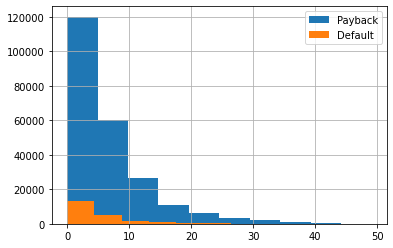

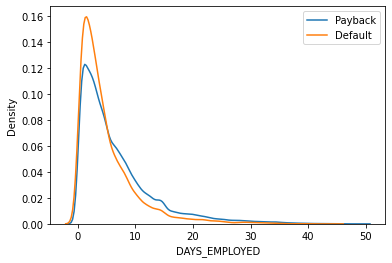

In [15]:
head = "DAYS_EMPLOYED"

payback[payback[head] < -100] = np.nan
default[default[head] < -100] = np.nan

payback[head].hist()
default[head].hist()
plt.legend(labels=["Payback","Default"])

plt.show()

sns.kdeplot(payback[head])
sns.kdeplot(default[head])
plt.legend(labels=["Payback","Default"])

plt.show()

### Analyse Telekom

In [21]:
head = "ORGANIZATION_TYPE"
payback_telecom = payback[payback[head] == "Telecom"]
default_telecom = 

SK_ID_CURR                    533
TARGET                        533
NAME_CONTRACT_TYPE            533
CODE_GENDER                   533
FLAG_OWN_CAR                  533
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     464
AMT_REQ_CREDIT_BUREAU_WEEK    464
AMT_REQ_CREDIT_BUREAU_MON     464
AMT_REQ_CREDIT_BUREAU_QRT     464
AMT_REQ_CREDIT_BUREAU_YEAR    464
Length: 122, dtype: int64

In [ ]:
pb = len(payback.index)
df = len(default.index)
N = pb + df

labels = "Payback", "Default"
sizes = [pb/N,df/N]
title = ""

arguments = [(labels, sizes, title)]
draw_piechart(arguments)